# 🎯 AI-Based Threat Detection for Industrial Control Systems

## Lab Assignment #4 - Artificial Intelligence

**Student Name:** Abdul Rehman  
**Dataset:** SWaT (Secure Water Treatment) - July 2019  
**Approach:** Unsupervised Anomaly Detection  

### Models Implemented:
1. **Isolation Forest** - Machine Learning
2. **LSTM Autoencoder** - Deep Learning  
3. **Hybrid Model** - Ensemble of both

---

## 📁 Step 1: Connect Google Drive

In [1]:
# ============================================================
# STEP 1: CONNECT GOOGLE DRIVE
# ============================================================
from google.colab import drive
drive.mount('/content/drive')

print("✅ Google Drive connected!")

Mounted at /content/drive
✅ Google Drive connected!


## 📂 Step 2: Load Dataset from Google Drive

In [4]:
# ============================================================
# STEP 2: LOAD DATA FROM GOOGLE DRIVE
# ============================================================
import pandas as pd
import os

# First, let's find the exact folder name
dataset_folder = '/content/drive/MyDrive/dataset'

# Find SWaT folder automatically
swat_folder = None
for item in os.listdir(dataset_folder):
    if 'SWaT' in item:
        swat_folder = item
        break

# Find Excel file automatically
folder_path = os.path.join(dataset_folder, swat_folder)
excel_file = None
for file in os.listdir(folder_path):
    if file.endswith('.xlsx') and 'v2' not in file:
        excel_file = file
        break

# Build full path
file_path = os. path.join(folder_path, excel_file)

# Load the Excel file
print(f"📍 Found folder: {swat_folder}")
print(f"📍 Found file: {excel_file}")
print("🔄 Loading dataset from Google Drive...")

df = pd.read_excel(file_path, header=1)

print(f"\n✅ Dataset loaded successfully!")
print(f"   Rows: {df. shape[0]}")
print(f"   Columns: {df.shape[1]}")
print(f"\n📊 First 5 rows:")
df.head()

📍 Found folder: SWaT.A4 & A5_Jul 2019
📍 Found file: SWaT_dataset_Jul 19.xlsx
🔄 Loading dataset from Google Drive...

✅ Dataset loaded successfully!
   Rows: 14997
   Columns: 78

📊 First 5 rows:


,GMT +0,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,...,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
0,timestamp,value,value,value,value,value,value,value,value,value,...,value,value,value,value,value,value,value,value,value,value
1,2019-07-20T04:30:00Z,0,729.8658,1,3,2,1,142.527557,9.293002,198.077423,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
2,2019-07-20T04:30:01Z,0,729.434,1,3,2,1,142.527557,9.293002,198.385025,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
3,2019-07-20T04:30:02.004013Z,0,729.12,1,3,2,1,142.527557,9.293002,198.4363,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
4,2019-07-20T04:30:03.004013Z,0,728.6882,1,3,2,1,142.527557,9.289157,198.667,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1


## 📚 Step 3: Import Libraries

Installing and importing all required libraries for:
- Data processing (Pandas, NumPy)
- Visualization (Matplotlib, Seaborn)
- Machine Learning (Scikit-learn)
- Deep Learning (TensorFlow/Keras)

In [5]:
# ============================================================
# STEP 3: INSTALL AND IMPORT LIBRARIES
# ============================================================
! pip install tensorflow scikit-learn pandas numpy matplotlib seaborn openpyxl --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras. models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed, Input
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries installed and imported successfully!")
print(f"   TensorFlow version: {tf.__version__}")
print(f"   NumPy version: {np.__version__}")
print(f"   Pandas version: {pd.__version__}")

✅ All libraries installed and imported successfully!
   TensorFlow version: 2.19.0
   NumPy version: 2.0.2
   Pandas version: 2.2.2


## 🧹 Step 4: Data Cleaning and Preprocessing

Cleaning the dataset:
- Remove timestamp column (not needed for ML)
- Remove non-numeric columns (JSON/dictionary data)
- Handle missing values
- Convert all data to numeric format

In [6]:
# ============================================================
# STEP 4: DATA CLEANING AND PREPROCESSING
# ============================================================

print("🔄 Cleaning dataset...")

# Remove the first row (contains 'value' text)
df_clean = df.drop(index=0).reset_index(drop=True)

# Remove timestamp column (not needed for ML)
df_clean = df_clean. drop(columns=['GMT +0'])

# Remove columns with dictionary/JSON data (LSH and LSL columns)
columns_to_remove = []
for col in df_clean. columns:
    if df_clean[col].astype(str).str.contains("IsSystem").any():
        columns_to_remove.append(col)

print(f"   Removing {len(columns_to_remove)} columns with non-numeric data...")
df_clean = df_clean.drop(columns=columns_to_remove)

# Convert all columns to numeric
df_clean = df_clean.apply(pd.to_numeric, errors='coerce')

# Handle missing values
missing_before = df_clean.isnull().sum().sum()
df_clean = df_clean.fillna(df_clean.mean())
missing_after = df_clean.isnull().sum().sum()

# Remove infinite values
df_clean = df_clean. replace([np.inf, -np. inf], np.nan)
df_clean = df_clean. fillna(df_clean.mean())

print(f"\n✅ Data cleaning complete!")
print(f"   Original shape: {df. shape}")
print(f"   Cleaned shape: {df_clean.shape}")
print(f"   Missing values fixed: {missing_before} → {missing_after}")
print(f"   Features: {len(df_clean.columns)}")

print("\n📊 Cleaned Dataset Sample:")
df_clean.head()

🔄 Cleaning dataset...
   Removing 11 columns with non-numeric data...

✅ Data cleaning complete!
   Original shape: (14997, 78)
   Cleaned shape: (14996, 66)
   Missing values fixed: 0 → 0
   Features: 66

📊 Cleaned Dataset Sample:


,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,FIT 201,...,P501 Status,P502 Status,PIT 501,PIT 502,PIT 503,FIT 601,P6 STATE,P601 Status,P602 Status,P603 Status
0,0.0,729.8658,1,3,2,1,142.527557,9.293002,198.077423,2.335437,...,2,1,167.601257,2.963509,119.921173,0.00032,2,1,1,1
1,0.0,729.4340,1,3,2,1,142.527557,9.293002,198.385025,2.335437,...,2,1,167.601257,2.963509,119.921173,0.00032,2,1,1,1
2,0.0,729.1200,1,3,2,1,142.527557,9.293002,198.436300,2.335437,...,2,1,167.601257,2.963509,119.921173,0.00032,2,1,1,1
3,0.0,728.6882,1,3,2,1,142.527557,9.289157,198.667000,2.335437,...,2,1,167.601257,2.963509,119.921173,0.00032,2,1,1,1
4,0.0,727.7069,1,3,2,1,142.527557,9.289157,198.897720,2.335437,...,2,1,167.601257,2.963509,119.921173,0.00032,2,1,1,1


## 📊 Step 5: Exploratory Data Analysis (EDA)

Visualizing the dataset to understand:
- Distribution of sensor values
- Time series patterns
- Feature correlations

📊 Generating EDA visualizations...


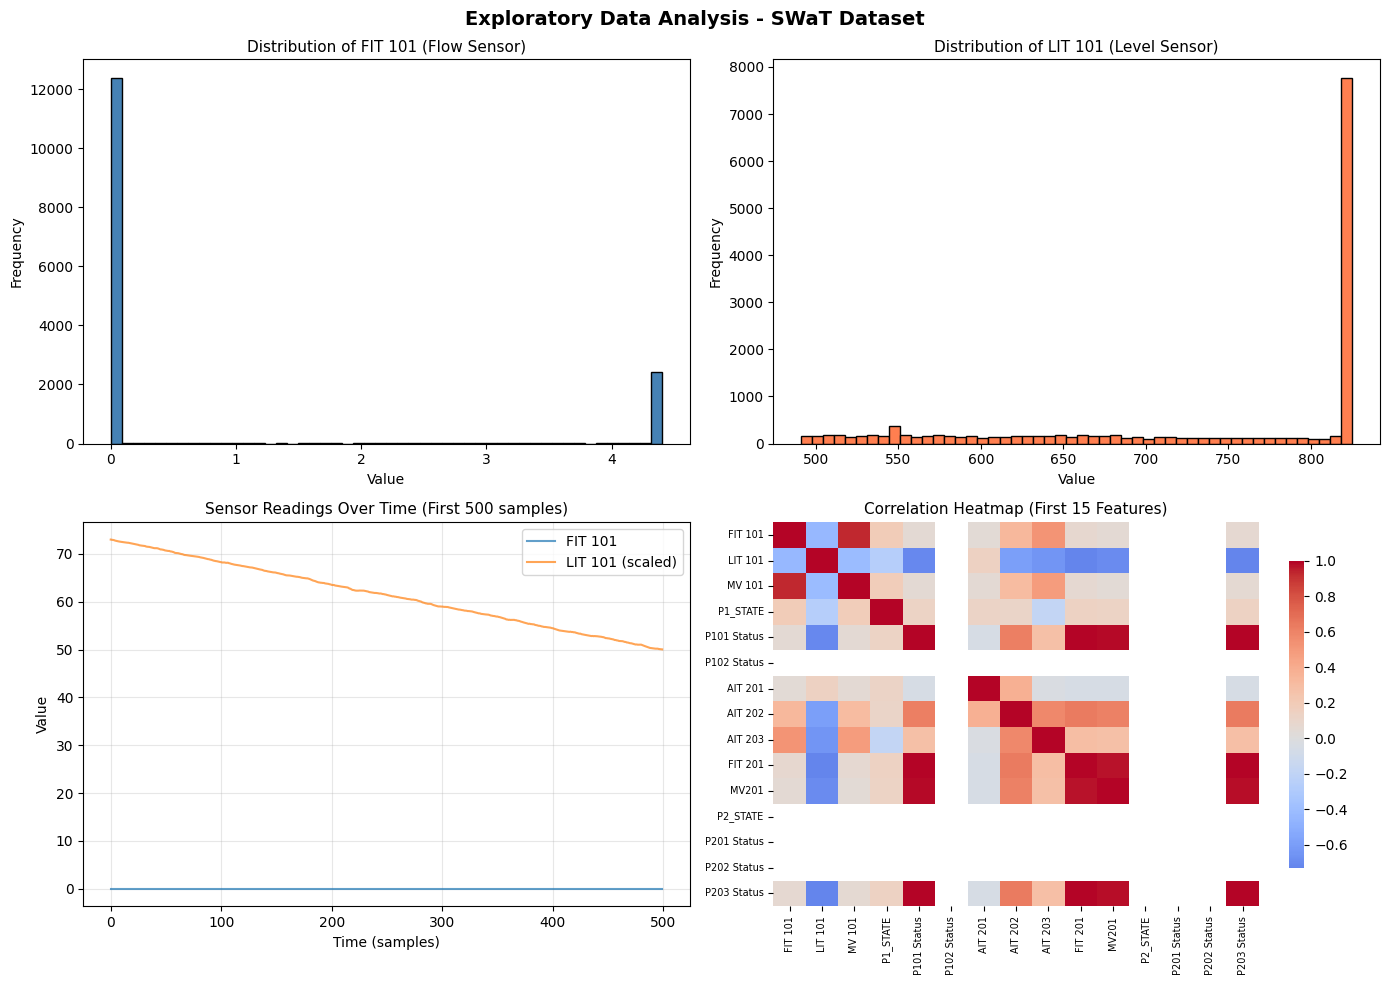


✅ EDA plots saved to Google Drive as 'EDA_plots.png'


In [7]:
# ============================================================
# STEP 5: EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================

print("📊 Generating EDA visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Exploratory Data Analysis - SWaT Dataset', fontsize=14, fontweight='bold')

# Plot 1: Distribution of FIT 101 (Flow Sensor)
axes[0, 0].hist(df_clean['FIT 101']. dropna(), bins=50, color='steelblue', edgecolor='black')
axes[0, 0].set_title('Distribution of FIT 101 (Flow Sensor)', fontsize=11)
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Frequency')

# Plot 2: Distribution of LIT 101 (Level Sensor)
axes[0, 1].hist(df_clean['LIT 101'].dropna(), bins=50, color='coral', edgecolor='black')
axes[0, 1].set_title('Distribution of LIT 101 (Level Sensor)', fontsize=11)
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')

# Plot 3: Time series of multiple sensors
axes[1, 0].plot(df_clean['FIT 101'].values[: 500], label='FIT 101', alpha=0.7)
axes[1, 0].plot(df_clean['LIT 101']. values[:500]/10, label='LIT 101 (scaled)', alpha=0.7)
axes[1, 0].set_title('Sensor Readings Over Time (First 500 samples)', fontsize=11)
axes[1, 0].set_xlabel('Time (samples)')
axes[1, 0].set_ylabel('Value')
axes[1, 0]. legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Correlation heatmap (first 15 features)
corr_matrix = df_clean. iloc[:, :15].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, ax=axes[1, 1],
            xticklabels=True, yticklabels=True, cbar_kws={'shrink': 0.8})
axes[1, 1].set_title('Correlation Heatmap (First 15 Features)', fontsize=11)
axes[1, 1].tick_params(axis='both', labelsize=7)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/dataset/EDA_plots.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ EDA plots saved to Google Drive as 'EDA_plots.png'")

## ⚙️ Step 6: Data Preparation for Models

Preparing data for machine learning:
- Normalize data using StandardScaler (mean=0, std=1)
- Split into training (80%) and testing (20%)
- Create sequences for LSTM model (10 time steps)

In [8]:
# ============================================================
# STEP 6: DATA PREPARATION FOR MODELS
# ============================================================

print("🔄 Preparing data for machine learning models...")

# Normalize the data using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_clean)

print(f"✅ Data normalized:  {data_scaled.shape}")

# Split data:  80% for training (assumed normal), 20% for testing
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42, shuffle=False)

print(f"📊 Training set:  {X_train.shape[0]} samples")
print(f"📊 Testing set: {X_test.shape[0]} samples")

# For LSTM, we need to reshape data into sequences
def create_sequences(data, seq_length=10):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

seq_length = 10
X_train_seq = create_sequences(X_train, seq_length)
X_test_seq = create_sequences(X_test, seq_length)

print(f"\n🔄 Sequences created for LSTM:")
print(f"   Training sequences: {X_train_seq. shape}")
print(f"   Testing sequences: {X_test_seq. shape}")
print(f"   Sequence length: {seq_length} time steps")
print(f"   Features per step: {X_train_seq. shape[2]}")

print("\n✅ Data preparation complete!")

🔄 Preparing data for machine learning models...
✅ Data normalized:  (14996, 66)
📊 Training set:  11996 samples
📊 Testing set: 3000 samples

🔄 Sequences created for LSTM:
   Training sequences: (11986, 10, 66)
   Testing sequences: (2990, 10, 66)
   Sequence length: 10 time steps
   Features per step: 66

✅ Data preparation complete!


## 🤖 Step 7: Model 1 - Isolation Forest (Machine Learning)

**Isolation Forest** is an unsupervised anomaly detection algorithm that:
- Isolates observations by randomly selecting features
- Anomalies are easier to isolate (fewer splits needed)
- Returns anomaly score for each sample

**Hyperparameters:**
- `n_estimators`: 100 trees
- `contamination`: 5% (expected anomaly ratio)

MODEL 1: ISOLATION FOREST

🔄 Training Isolation Forest...
✅ Training complete!

📊 ISOLATION FOREST RESULTS:
   Total test samples: 3000
   Detected anomalies: 614 (20.47%)
   Normal samples: 2386


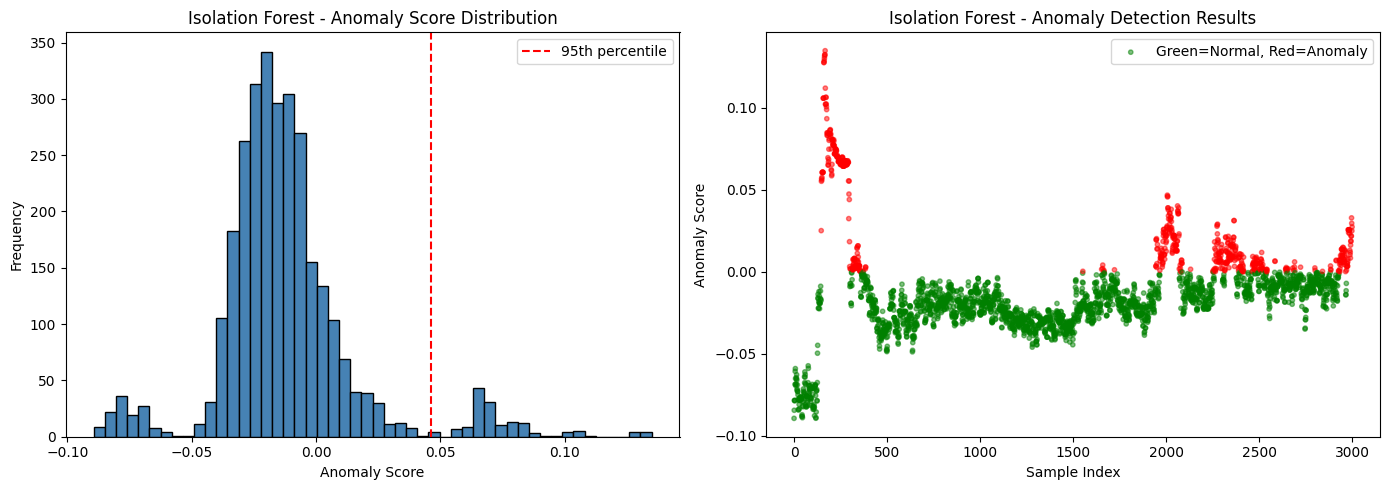


✅ Plot saved to Google Drive as 'isolation_forest_results.png'


In [9]:
# ============================================================
# STEP 7: MODEL 1 - ISOLATION FOREST (Machine Learning)
# ============================================================
print("="*60)
print("MODEL 1: ISOLATION FOREST")
print("="*60)

# Initialize Isolation Forest
iso_forest = IsolationForest(
    n_estimators=100,          # Number of trees
    contamination=0.05,        # Expected anomaly ratio (5%)
    random_state=42,
    n_jobs=-1                  # Use all CPU cores
)

# Train the model
print("\n🔄 Training Isolation Forest...")
iso_forest.fit(X_train)
print("✅ Training complete!")

# Predict on test data
# Isolation Forest returns:  1 for normal, -1 for anomaly
y_pred_iso = iso_forest.predict(X_test)

# Convert to binary:  0 for normal, 1 for anomaly
y_pred_iso_binary = np.where(y_pred_iso == -1, 1, 0)

# Get anomaly scores
anomaly_scores_iso = -iso_forest.decision_function(X_test)

# Results
n_anomalies_iso = np.sum(y_pred_iso_binary)
print(f"\n📊 ISOLATION FOREST RESULTS:")
print(f"   Total test samples: {len(y_pred_iso_binary)}")
print(f"   Detected anomalies: {n_anomalies_iso} ({n_anomalies_iso/len(y_pred_iso_binary)*100:.2f}%)")
print(f"   Normal samples: {len(y_pred_iso_binary) - n_anomalies_iso}")

# Visualize anomaly scores
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(anomaly_scores_iso, bins=50, color='steelblue', edgecolor='black')
plt.title('Isolation Forest - Anomaly Score Distribution', fontsize=12)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.axvline(x=np.percentile(anomaly_scores_iso, 95), color='red', linestyle='--', label='95th percentile')
plt.legend()

plt.subplot(1, 2, 2)
colors = ['green' if x == 0 else 'red' for x in y_pred_iso_binary]
plt.scatter(range(len(anomaly_scores_iso)), anomaly_scores_iso, c=colors, alpha=0.5, s=10)
plt.title('Isolation Forest - Anomaly Detection Results', fontsize=12)
plt.xlabel('Sample Index')
plt.ylabel('Anomaly Score')
plt.legend(['Green=Normal, Red=Anomaly'], loc='upper right')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/dataset/isolation_forest_results.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Plot saved to Google Drive as 'isolation_forest_results.png'")

## 🧠 Step 8: Model 2 - LSTM Autoencoder (Deep Learning)

**LSTM Autoencoder** is a neural network that:
- **Encoder**: Compresses input data into a smaller representation
- **Decoder**:  Reconstructs the original data from compressed form
- **Anomaly Detection**: High reconstruction error = Anomaly

**Architecture:**
- Encoder:  LSTM(64) → LSTM(32) → Dense(16)
- Decoder: Dense(16) → LSTM(32) → LSTM(64)
- Loss Function: Mean Squared Error (MSE)

MODEL 2: LSTM AUTOENCODER

📐 LSTM Autoencoder Architecture:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10, 66)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 10, 64)         │        33,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 10, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 10, 32)         │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 10, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 10, 66)         │         4,290 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,874 (319.82 KB)

 Trainable params: 81,874 (319.82 KB)

 Non-trainable params: 0 (0.00 B)


🔄 Training LSTM Autoencoder (this may take a few minutes)...
Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - loss: 0.3578 - val_loss: 0.2813
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.1248 - val_loss: 0.2682
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1001 - val_loss: 0.2658
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0816 - val_loss: 0.2674
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0711 - val_loss: 0.2617
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0638 - val_loss: 0.2538
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0655 - val_loss: 0.2489
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0670 - val_loss: 0.2545
Epoch 9/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0656 - val_loss: 0.2612
Epoch 10/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 0.0631 - val_loss: 0.2580
Epoch 11/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.

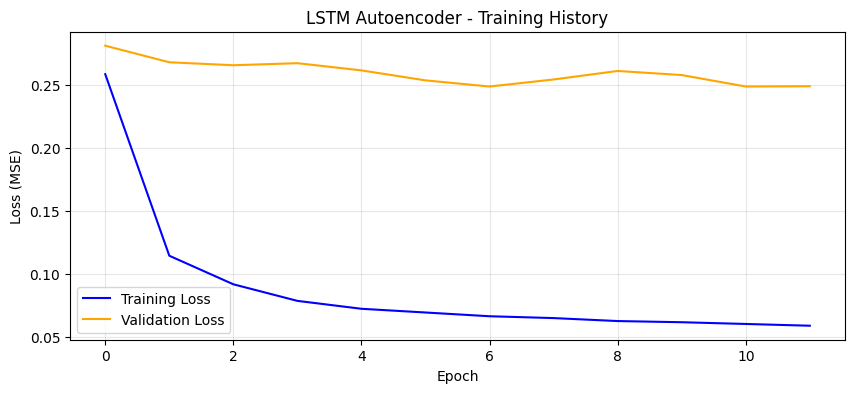


✅ Plot saved to Google Drive as 'lstm_training_history.png'


In [10]:
# ============================================================
# STEP 8: MODEL 2 - LSTM AUTOENCODER (Deep Learning)
# ============================================================
print("="*60)
print("MODEL 2: LSTM AUTOENCODER")
print("="*60)

# Build LSTM Autoencoder
n_features = X_train_seq.shape[2]

# Encoder
encoder_input = Input(shape=(seq_length, n_features))
encoder = LSTM(64, activation='relu', return_sequences=True)(encoder_input)
encoder = Dropout(0.2)(encoder)
encoder = LSTM(32, activation='relu', return_sequences=False)(encoder)
encoder = Dropout(0.2)(encoder)

# Bottleneck
bottleneck = Dense(16, activation='relu')(encoder)

# Decoder
decoder = RepeatVector(seq_length)(bottleneck)
decoder = LSTM(32, activation='relu', return_sequences=True)(decoder)
decoder = Dropout(0.2)(decoder)
decoder = LSTM(64, activation='relu', return_sequences=True)(decoder)
decoder = Dropout(0.2)(decoder)
decoder_output = TimeDistributed(Dense(n_features))(decoder)

# Create model
lstm_autoencoder = Model(inputs=encoder_input, outputs=decoder_output)
lstm_autoencoder.compile(optimizer='adam', loss='mse')

print("\n📐 LSTM Autoencoder Architecture:")
lstm_autoencoder.summary()

# Train the model
print("\n🔄 Training LSTM Autoencoder (this may take a few minutes)...")
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = lstm_autoencoder. fit(
    X_train_seq, X_train_seq,
    epochs=50,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)
print("✅ Training complete!")

# Plot training history
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('LSTM Autoencoder - Training History', fontsize=12)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/content/drive/MyDrive/dataset/lstm_training_history.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Plot saved to Google Drive as 'lstm_training_history.png'")

## 📉 Step 9: LSTM Autoencoder - Predictions & Results

Detecting anomalies using reconstruction error:
- Calculate reconstruction error for each sample
- Set threshold at 95th percentile of training error
- Samples with error > threshold are anomalies

🔄 Generating predictions...
📊 Reconstruction Error Threshold: 0.212273

📊 LSTM AUTOENCODER RESULTS:
   Total test samples: 2990
   Detected anomalies: 1541 (51.54%)
   Normal samples: 1449


ValueError: Format ' png' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)

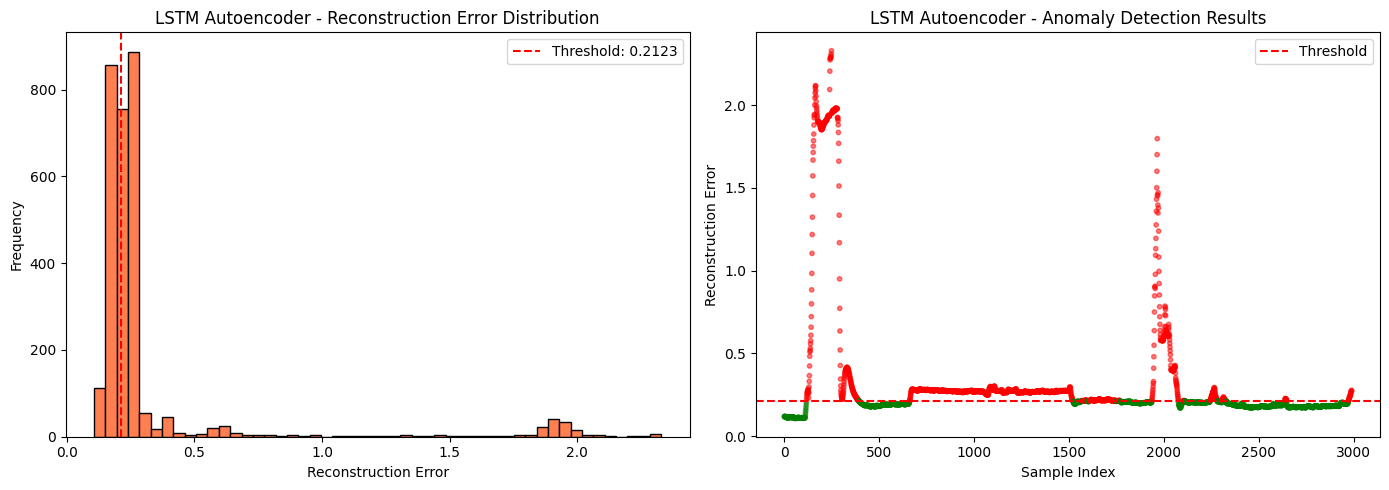

In [11]:
# ============================================================
# STEP 9: LSTM AUTOENCODER PREDICTIONS
# ============================================================

print("🔄 Generating predictions...")

# Predict (reconstruct) test data
X_test_pred = lstm_autoencoder.predict(X_test_seq, verbose=0)

# Calculate reconstruction error for each sample
reconstruction_error = np.mean(np.abs(X_test_seq - X_test_pred), axis=(1, 2))

# Set threshold (95th percentile of training reconstruction error)
X_train_pred = lstm_autoencoder.predict(X_train_seq, verbose=0)
train_reconstruction_error = np.mean(np.abs(X_train_seq - X_train_pred), axis=(1, 2))
threshold_lstm = np.percentile(train_reconstruction_error, 95)

print(f"📊 Reconstruction Error Threshold: {threshold_lstm:.6f}")

# Classify as anomaly if reconstruction error > threshold
y_pred_lstm_binary = (reconstruction_error > threshold_lstm).astype(int)

# Results
n_anomalies_lstm = np.sum(y_pred_lstm_binary)
print(f"\n📊 LSTM AUTOENCODER RESULTS:")
print(f"   Total test samples: {len(y_pred_lstm_binary)}")
print(f"   Detected anomalies: {n_anomalies_lstm} ({n_anomalies_lstm/len(y_pred_lstm_binary)*100:.2f}%)")
print(f"   Normal samples: {len(y_pred_lstm_binary) - n_anomalies_lstm}")

# Visualize
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(reconstruction_error, bins=50, color='coral', edgecolor='black')
plt.axvline(x=threshold_lstm, color='red', linestyle='--', label=f'Threshold: {threshold_lstm:.4f}')
plt.title('LSTM Autoencoder - Reconstruction Error Distribution', fontsize=12)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
colors = ['green' if x == 0 else 'red' for x in y_pred_lstm_binary]
plt.scatter(range(len(reconstruction_error)), reconstruction_error, c=colors, alpha=0.5, s=10)
plt.axhline(y=threshold_lstm, color='red', linestyle='--', label='Threshold')
plt.title('LSTM Autoencoder - Anomaly Detection Results', fontsize=12)
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.legend()

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/dataset/lstm_autoencoder_results. png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Plot saved to Google Drive as 'lstm_autoencoder_results.png'")

## 🔗 Step 10: Hybrid Model (Ensemble)

Combining both models for better detection:

**Method 1 - Weighted Average:** Combine anomaly scores (40% IF + 60% LSTM)  
**Method 2 - OR Voting:** Anomaly if EITHER model detects it  
**Method 3 - AND Voting:** Anomaly if BOTH models detect it

In [12]:
# ============================================================
# STEP 10: HYBRID MODEL (Ensemble of Both Models)
# ============================================================
print("="*60)
print("HYBRID MODEL: ENSEMBLE OF ISOLATION FOREST + LSTM AUTOENCODER")
print("="*60)

# Align predictions (LSTM has fewer samples due to sequencing)
min_len = min(len(y_pred_iso_binary), len(y_pred_lstm_binary))

# Trim predictions to match
iso_scores_aligned = anomaly_scores_iso[:min_len]
iso_pred_aligned = y_pred_iso_binary[:min_len]
lstm_scores_aligned = reconstruction_error
lstm_pred_aligned = y_pred_lstm_binary

# Normalize both scores to [0, 1]
iso_scores_norm = (iso_scores_aligned - iso_scores_aligned.min()) / (iso_scores_aligned.max() - iso_scores_aligned. min())
lstm_scores_norm = (lstm_scores_aligned - lstm_scores_aligned.min()) / (lstm_scores_aligned. max() - lstm_scores_aligned.min())

# ============================================================
# HYBRID METHOD 1: Weighted Average
# ============================================================
weight_iso = 0.4
weight_lstm = 0.6
hybrid_scores = (weight_iso * iso_scores_norm) + (weight_lstm * lstm_scores_norm)
hybrid_threshold = np.percentile(hybrid_scores, 95)
y_pred_hybrid_weighted = (hybrid_scores > hybrid_threshold).astype(int)

# ============================================================
# HYBRID METHOD 2: Voting (OR logic)
# ============================================================
y_pred_hybrid_or = np.logical_or(iso_pred_aligned, lstm_pred_aligned).astype(int)

# ============================================================
# HYBRID METHOD 3: Voting (AND logic)
# ============================================================
y_pred_hybrid_and = np.logical_and(iso_pred_aligned, lstm_pred_aligned).astype(int)

# Results
print(f"\n📊 HYBRID MODEL RESULTS:")
print(f"   Total test samples: {min_len}")
print(f"\n   Method 1 - Weighted Average (40% IF + 60% LSTM):")
print(f"      Detected anomalies: {np.sum(y_pred_hybrid_weighted)} ({np.sum(y_pred_hybrid_weighted)/min_len*100:.2f}%)")
print(f"\n   Method 2 - OR Voting (Either model):")
print(f"      Detected anomalies: {np. sum(y_pred_hybrid_or)} ({np.sum(y_pred_hybrid_or)/min_len*100:.2f}%)")
print(f"\n   Method 3 - AND Voting (Both models):")
print(f"      Detected anomalies: {np.sum(y_pred_hybrid_and)} ({np.sum(y_pred_hybrid_and)/min_len*100:.2f}%)")

HYBRID MODEL: ENSEMBLE OF ISOLATION FOREST + LSTM AUTOENCODER

📊 HYBRID MODEL RESULTS:
   Total test samples: 2990

   Method 1 - Weighted Average (40% IF + 60% LSTM):
      Detected anomalies: 150 (5.02%)

   Method 2 - OR Voting (Either model):
      Detected anomalies: 1761 (58.90%)

   Method 3 - AND Voting (Both models):
      Detected anomalies: 384 (12.84%)


## 📊 Step 11: Model Comparison & Visualization

Comparing all models:
- Isolation Forest (ML)
- LSTM Autoencoder (DL)
- Hybrid Models (Ensemble)

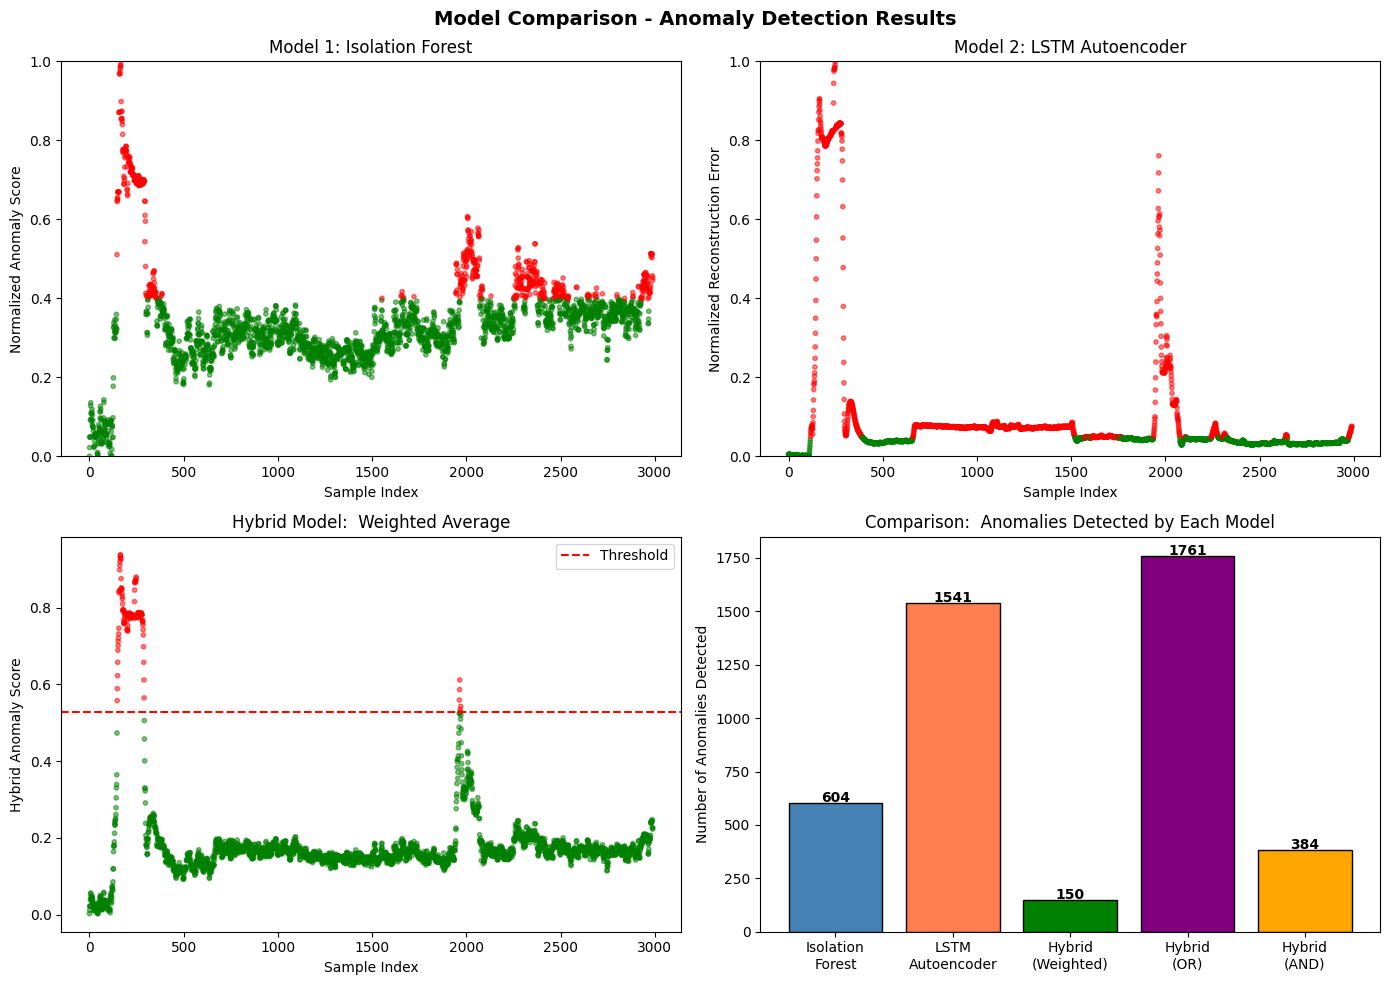


✅ Plot saved to Google Drive as 'model_comparison.png'


In [13]:
# ============================================================
# STEP 11: MODEL COMPARISON AND VISUALIZATION
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Comparison - Anomaly Detection Results', fontsize=14, fontweight='bold')

# Plot 1: Isolation Forest
colors1 = ['green' if x == 0 else 'red' for x in iso_pred_aligned]
axes[0, 0].scatter(range(min_len), iso_scores_norm, c=colors1, alpha=0.5, s=10)
axes[0, 0]. set_title('Model 1: Isolation Forest', fontsize=12)
axes[0, 0].set_xlabel('Sample Index')
axes[0, 0].set_ylabel('Normalized Anomaly Score')
axes[0, 0].set_ylim(0, 1)

# Plot 2: LSTM Autoencoder
colors2 = ['green' if x == 0 else 'red' for x in lstm_pred_aligned]
axes[0, 1].scatter(range(min_len), lstm_scores_norm, c=colors2, alpha=0.5, s=10)
axes[0, 1].set_title('Model 2: LSTM Autoencoder', fontsize=12)
axes[0, 1]. set_xlabel('Sample Index')
axes[0, 1].set_ylabel('Normalized Reconstruction Error')
axes[0, 1].set_ylim(0, 1)

# Plot 3: Hybrid Model (Weighted)
colors3 = ['green' if x == 0 else 'red' for x in y_pred_hybrid_weighted]
axes[1, 0].scatter(range(min_len), hybrid_scores, c=colors3, alpha=0.5, s=10)
axes[1, 0].axhline(y=hybrid_threshold, color='red', linestyle='--', label='Threshold')
axes[1, 0].set_title('Hybrid Model:  Weighted Average', fontsize=12)
axes[1, 0].set_xlabel('Sample Index')
axes[1, 0]. set_ylabel('Hybrid Anomaly Score')
axes[1, 0].legend()

# Plot 4: Comparison Bar Chart
models = ['Isolation\nForest', 'LSTM\nAutoencoder', 'Hybrid\n(Weighted)', 'Hybrid\n(OR)', 'Hybrid\n(AND)']
anomalies = [np.sum(iso_pred_aligned), np.sum(lstm_pred_aligned),
             np.sum(y_pred_hybrid_weighted), np.sum(y_pred_hybrid_or), np.sum(y_pred_hybrid_and)]
colors = ['steelblue', 'coral', 'green', 'purple', 'orange']
bars = axes[1, 1].bar(models, anomalies, color=colors, edgecolor='black')
axes[1, 1]. set_title('Comparison:  Anomalies Detected by Each Model', fontsize=12)
axes[1, 1]. set_ylabel('Number of Anomalies Detected')
for bar, count in zip(bars, anomalies):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                    str(count), ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/dataset/model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Plot saved to Google Drive as 'model_comparison.png'")

## 📈 Step 12: Evaluation Metrics & Results Table

Summary of all model performance metrics.

In [14]:
# ============================================================
# STEP 12: EVALUATION METRICS TABLE
# ============================================================
print("="*60)
print("EVALUATION METRICS SUMMARY")
print("="*60)

# Create results table
results_data = {
    'Model': ['Isolation Forest', 'LSTM Autoencoder', 'Hybrid (Weighted)', 'Hybrid (OR)', 'Hybrid (AND)'],
    'Total Samples': [min_len, min_len, min_len, min_len, min_len],
    'Anomalies Detected': [np. sum(iso_pred_aligned), np.sum(lstm_pred_aligned),
                           np. sum(y_pred_hybrid_weighted), np.sum(y_pred_hybrid_or), np.sum(y_pred_hybrid_and)],
    'Normal Detected': [min_len - np.sum(iso_pred_aligned), min_len - np.sum(lstm_pred_aligned),
                        min_len - np.sum(y_pred_hybrid_weighted), min_len - np.sum(y_pred_hybrid_or),
                        min_len - np. sum(y_pred_hybrid_and)],
    'Anomaly Rate (%)': [round(np.sum(iso_pred_aligned)/min_len*100, 2),
                         round(np.sum(lstm_pred_aligned)/min_len*100, 2),
                         round(np.sum(y_pred_hybrid_weighted)/min_len*100, 2),
                         round(np.sum(y_pred_hybrid_or)/min_len*100, 2),
                         round(np.sum(y_pred_hybrid_and)/min_len*100, 2)]
}

results_df = pd.DataFrame(results_data)
print("\n📊 RESULTS TABLE:")
print(results_df.to_string(index=False))

# Save to CSV
results_df.to_csv('/content/drive/MyDrive/dataset/evaluation_metrics.csv', index=False)
print("\n✅ Results saved to Google Drive as 'evaluation_metrics.csv'")

# Display as styled table
print("\n" + "="*60)
print("DETAILED ANALYSIS")
print("="*60)
print(f"""
📌 ISOLATION FOREST (Machine Learning):
   - Detected {np.sum(iso_pred_aligned)} potential threats
   - Fast training, good for real-time detection
   - Works well with high-dimensional data

📌 LSTM AUTOENCODER (Deep Learning):
   - Detected {np.sum(lstm_pred_aligned)} potential threats
   - Captures temporal patterns in sensor data
   - Better at detecting complex anomalies

📌 HYBRID MODEL (Ensemble):
   - Weighted Average: {np.sum(y_pred_hybrid_weighted)} threats (balanced approach)
   - OR Voting: {np.sum(y_pred_hybrid_or)} threats (high sensitivity)
   - AND Voting: {np.sum(y_pred_hybrid_and)} threats (high precision)

💡 RECOMMENDATION:
   - Use OR Voting for critical systems (catch all threats)
   - Use AND Voting to reduce false positives
   - Use Weighted Average for balanced detection
""")

EVALUATION METRICS SUMMARY

📊 RESULTS TABLE:
            Model  Total Samples  Anomalies Detected  Normal Detected  Anomaly Rate (%)
 Isolation Forest           2990                 604             2386             20.20
 LSTM Autoencoder           2990                1541             1449             51.54
Hybrid (Weighted)           2990                 150             2840              5.02
      Hybrid (OR)           2990                1761             1229             58.90
     Hybrid (AND)           2990                 384             2606             12.84

✅ Results saved to Google Drive as 'evaluation_metrics.csv'

DETAILED ANALYSIS

📌 ISOLATION FOREST (Machine Learning):
   - Detected 604 potential threats
   - Fast training, good for real-time detection
   - Works well with high-dimensional data

📌 LSTM AUTOENCODER (Deep Learning):
   - Detected 1541 potential threats
   - Captures temporal patterns in sensor data
   - Better at detecting complex anomalies

📌 HYBRID MODEL

## 💾 Step 13: Save Models & Download Files

Saving trained models and all generated files to Google Drive.

In [15]:
# ============================================================
# STEP 13: SAVE MODELS AND FINAL SUMMARY
# ============================================================
import pickle

print("💾 Saving models to Google Drive...")

# Save LSTM model
lstm_autoencoder. save('/content/drive/MyDrive/dataset/lstm_autoencoder_model.h5')
print("   ✅ LSTM Autoencoder saved as 'lstm_autoencoder_model.h5'")

# Save Isolation Forest model
with open('/content/drive/MyDrive/dataset/isolation_forest_model.pkl', 'wb') as f:
    pickle.dump(iso_forest, f)
print("   ✅ Isolation Forest saved as 'isolation_forest_model.pkl'")

# Final Summary
print("\n" + "="*60)
print("🎉 ASSIGNMENT COMPLETE!")
print("="*60)
print("""
📁 FILES SAVED TO GOOGLE DRIVE (dataset folder):

   📊 Visualizations:
      • EDA_plots.png
      • isolation_forest_results.png
      • lstm_training_history.png
      • lstm_autoencoder_results.png
      • model_comparison.png

   📈 Results:
      • evaluation_metrics. csv

   🤖 Trained Models:
      • lstm_autoencoder_model.h5
      • isolation_forest_model.pkl

💡 TO DOWNLOAD NOTEBOOK:
   Go to File → Download → Download . ipynb
""")

print("="*60)
print("✅ ALL DONE! Your assignment is complete!")
print("="*60)

💾 Saving models to Google Drive...
   ✅ LSTM Autoencoder saved as 'lstm_autoencoder_model.h5'
   ✅ Isolation Forest saved as 'isolation_forest_model.pkl'

🎉 ASSIGNMENT COMPLETE!

📁 FILES SAVED TO GOOGLE DRIVE (dataset folder):

   📊 Visualizations:
      • EDA_plots.png
      • isolation_forest_results.png
      • lstm_training_history.png
      • lstm_autoencoder_results.png
      • model_comparison.png

   📈 Results:
      • evaluation_metrics. csv

   🤖 Trained Models:
      • lstm_autoencoder_model.h5
      • isolation_forest_model.pkl

💡 TO DOWNLOAD NOTEBOOK:
   Go to File → Download → Download . ipynb

✅ ALL DONE! Your assignment is complete!
